In [31]:
import  re
import  pandas  as  pd
import  numpy  as  np 
import  matplotlib.pyplot  as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [32]:
data = pd.read_csv('wineData.csv')
data.head()

,obs_id,title,winery,country,province,region_1,variety,description,points,price
0,0,Nicosia 2013 Vulkà Bianco (Etna),Nicosia,Italy,Sicily & Sardinia,Etna,White Blend,"Aromas include tropical fruit, broom, brimston...",87,NaN
1,1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos,Portugal,Douro,NaN,Portuguese Red,"This is ripe and fruity, a wine that is smooth...",87,15.0
2,2,Rainstorm 2013 Pinot Gris (Willamette Valley),Rainstorm,US,Oregon,Willamette Valley,Pinot Gris,"Tart and snappy, the flavors of lime flesh and...",87,14.0
3,3,St. Julian 2013 Reserve Late Harvest Riesling ...,St. Julian,US,Michigan,Lake Michigan Shore,Riesling,"Pineapple rind, lemon pith and orange blossom ...",87,13.0
4,4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Sweet Cheeks,US,Oregon,Willamette Valley,Pinot Noir,"Much like the regular bottling from 2012, this...",87,65.0


In [33]:
num_observations = num_obs  = data["obs_id"].nunique()
num_observations

129971

In [34]:

# Establish the bins # Estab 
points_bins = [79, 85, 90, 95, 101]
group_names = ["80-84", "85-89", "90-94", "95-100"]

# Categorize the existing players using the age bins
data["Point Ranges"] = pd.cut(data["points"], points_bins, labels=group_names)

# Calculate the Numbers and Percentages by Age Group
point_totals = data["Point Ranges"].value_counts()
point_percents = point_totals / num_observations * 100
point_df = pd.DataFrame({"Total Count": point_totals, "Percentage of Reviews": point_percents})

# Minor Data Munging
point_df = point_df.round(2)

# Display Age Demographics Table
point_df.sort_index()

,Total Count,Percentage of Reviews
80-84,21960,16.90
85-89,74376,57.23
90-94,32754,25.20
95-100,881,0.68


In [48]:
data.head()

,obs_id,title,winery,country,province,region_1,variety,description,points,price,Point Ranges,tidy_review
0,0,Nicosia 2013 Vulkà Bianco (Etna),Nicosia,Italy,Sicily & Sardinia,Etna,White Blend,"Aromas include tropical fruit, broom, brimston...",87,NaN,85-89,aroma includ tropic fruit broom brimston dri h...
1,1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos,Portugal,Douro,NaN,Portuguese Red,"This is ripe and fruity, a wine that is smooth...",87,15.0,85-89,thi ripe fruiti wine that smooth while still s...
2,2,Rainstorm 2013 Pinot Gris (Willamette Valley),Rainstorm,US,Oregon,Willamette Valley,Pinot Gris,"Tart and snappy, the flavors of lime flesh and...",87,14.0,85-89,tart snappi flavor lime flesh rind domin some ...
3,3,St. Julian 2013 Reserve Late Harvest Riesling ...,St. Julian,US,Michigan,Lake Michigan Shore,Riesling,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,85-89,pineappl rind lemon pith orang blossom start a...
4,4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Sweet Cheeks,US,Oregon,Willamette Valley,Pinot Noir,"Much like the regular bottling from 2012, this...",87,65.0,85-89,much like regular bottl from thi come across r...


In [49]:
data = pd.get_dummies(data, columns=["Point Ranges"])
data.head()

,obs_id,title,winery,country,province,region_1,variety,description,points,price,tidy_review,Point Ranges_80-84,Point Ranges_85-89,Point Ranges_90-94,Point Ranges_95-100
0,0,Nicosia 2013 Vulkà Bianco (Etna),Nicosia,Italy,Sicily & Sardinia,Etna,White Blend,"Aromas include tropical fruit, broom, brimston...",87,NaN,aroma includ tropic fruit broom brimston dri h...,0,1,0,0
1,1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos,Portugal,Douro,NaN,Portuguese Red,"This is ripe and fruity, a wine that is smooth...",87,15.0,thi ripe fruiti wine that smooth while still s...,0,1,0,0
2,2,Rainstorm 2013 Pinot Gris (Willamette Valley),Rainstorm,US,Oregon,Willamette Valley,Pinot Gris,"Tart and snappy, the flavors of lime flesh and...",87,14.0,tart snappi flavor lime flesh rind domin some ...,0,1,0,0
3,3,St. Julian 2013 Reserve Late Harvest Riesling ...,St. Julian,US,Michigan,Lake Michigan Shore,Riesling,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,pineappl rind lemon pith orang blossom start a...,0,1,0,0
4,4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Sweet Cheeks,US,Oregon,Willamette Valley,Pinot Noir,"Much like the regular bottling from 2012, this...",87,65.0,much like regular bottl from thi come across r...,0,1,0,0


In [66]:
data.to_csv("cleaned_data.csv")

In [50]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [51]:
# remove (@user)
data['tidy_review'] = np.vectorize(remove_pattern)(data['description'], "@[\w]*")

In [52]:
# remove special characters, numbers, punctuations# remove 
data['tidy_review'] = data['tidy_review'].str.replace("[^a-zA-Z#]", " ")

In [53]:
# remove small words
data['tidy_review'] = data['tidy_review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [54]:
data.head()

,obs_id,title,winery,country,province,region_1,variety,description,points,price,tidy_review,Point Ranges_80-84,Point Ranges_85-89,Point Ranges_90-94,Point Ranges_95-100
0,0,Nicosia 2013 Vulkà Bianco (Etna),Nicosia,Italy,Sicily & Sardinia,Etna,White Blend,"Aromas include tropical fruit, broom, brimston...",87,NaN,Aromas include tropical fruit broom brimstone ...,0,1,0,0
1,1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos,Portugal,Douro,NaN,Portuguese Red,"This is ripe and fruity, a wine that is smooth...",87,15.0,This ripe fruity wine that smooth while still ...,0,1,0,0
2,2,Rainstorm 2013 Pinot Gris (Willamette Valley),Rainstorm,US,Oregon,Willamette Valley,Pinot Gris,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Tart snappy flavors lime flesh rind dominate S...,0,1,0,0
3,3,St. Julian 2013 Reserve Late Harvest Riesling ...,St. Julian,US,Michigan,Lake Michigan Shore,Riesling,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Pineapple rind lemon pith orange blossom start...,0,1,0,0
4,4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Sweet Cheeks,US,Oregon,Willamette Valley,Pinot Noir,"Much like the regular bottling from 2012, this...",87,65.0,Much like regular bottling from this comes acr...,0,1,0,0


In [55]:
data.columns

Index(['obs_id', 'title', 'winery', 'country', 'province', 'region_1',
       'variety', 'description', 'points', 'price', 'tidy_review',
       'Point Ranges_80-84', 'Point Ranges_85-89', 'Point Ranges_90-94',
       'Point Ranges_95-100'],
      dtype='object')

In [56]:
# Tokenization
tokenized_word = data['tidy_review'].apply(lambda x: x.split())
tokenized_word.head()

0    [Aromas, include, tropical, fruit, broom, brim...
1    [This, ripe, fruity, wine, that, smooth, while...
2    [Tart, snappy, flavors, lime, flesh, rind, dom...
3    [Pineapple, rind, lemon, pith, orange, blossom...
4    [Much, like, regular, bottling, from, this, co...
Name: tidy_review, dtype: object

In [57]:
data["tidy_review"].head()

0    Aromas include tropical fruit broom brimstone ...
1    This ripe fruity wine that smooth while still ...
2    Tart snappy flavors lime flesh rind dominate S...
3    Pineapple rind lemon pith orange blossom start...
4    Much like regular bottling from this comes acr...
Name: tidy_review, dtype: object

In [58]:
# Stemming (strips suffixes)
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_word = tokenized_word.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_word.head()

0    [aroma, includ, tropic, fruit, broom, brimston...
1    [thi, ripe, fruiti, wine, that, smooth, while,...
2    [tart, snappi, flavor, lime, flesh, rind, domi...
3    [pineappl, rind, lemon, pith, orang, blossom, ...
4    [much, like, regular, bottl, from, thi, come, ...
Name: tidy_review, dtype: object

In [59]:
for i in range(len(tokenized_word)):
    tokenized_word[i] = ' '.join(tokenized_word[i])

    data['tidy_review'] = tokenized_word

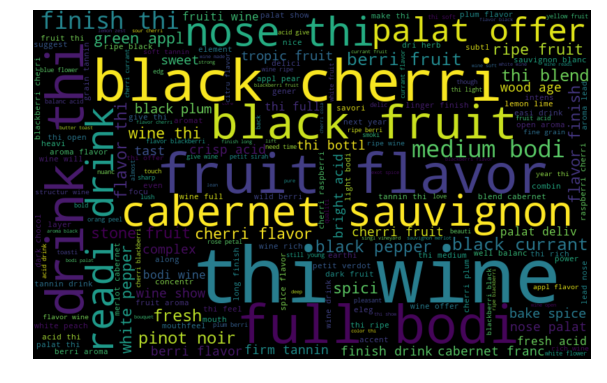

In [60]:
# WordCloud for all words
all_words = ' '.join([text for text in data['tidy_review']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

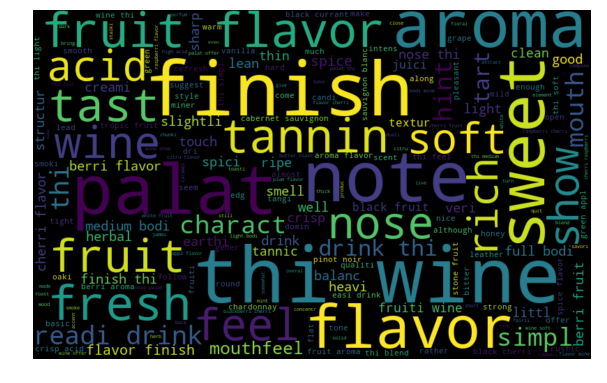

In [61]:
below_average =' '.join([text for text in data['tidy_review'][data['Point Ranges_80-84'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(below_average)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

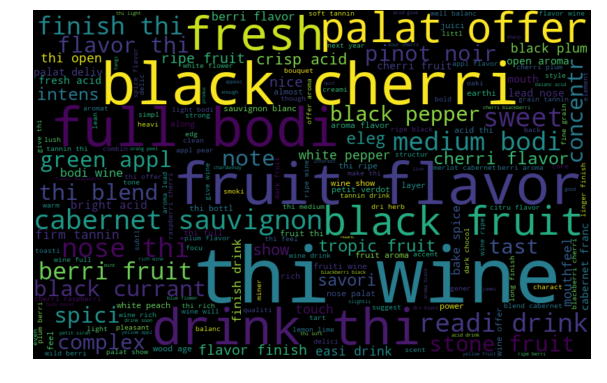

In [62]:
average =' '.join([text for text in data['tidy_review'][data['Point Ranges_85-89'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(average)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

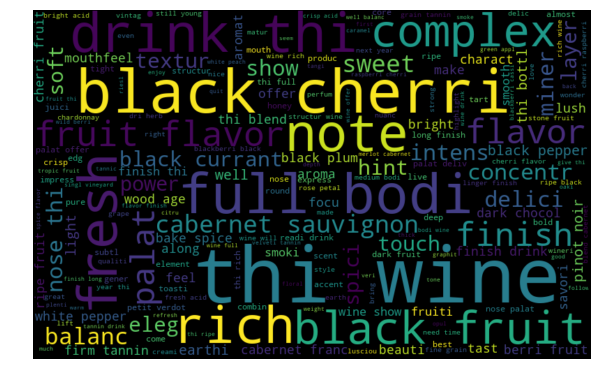

In [63]:
good =' '.join([text for text in data['tidy_review'][data['Point Ranges_90-94'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(good)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

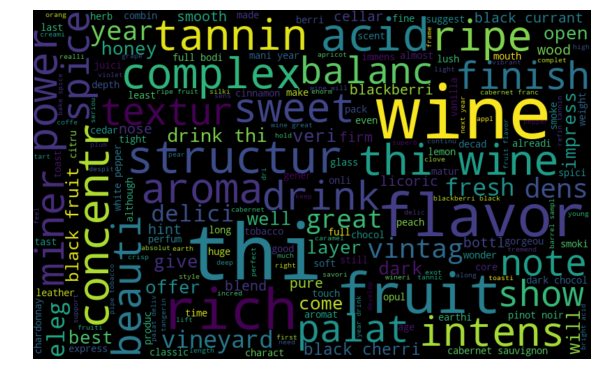

In [64]:
very_good =' '.join([text for text in data['tidy_review'][data['Point Ranges_95-100'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(very_good)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [65]:
selected_words = ["Flower",
       "Iris",
       "Peony",
       "Elderflower",
       "Acacia",
       "Lilac",
       "Jasmine",
       "Honeysuckle",
       "Violet",
       "Lavender",
       "Rose",
       "Potpourri",
       "Hibiscus",
       "Citrus",
       "Lime",
       "Lemon",
       "Grapefruit",
       "Orange",
       "Marmalade",
       "Tree Fruit",
       "Quince",
       "Apple",
       "Pear",
       "Nectarine",
       "Peach",
       "Apricot",
       "Persimmon",
       "Tropical Fruit",
       "Pineapple",
       "Mango",
       "Guava",
       "Passion Fruit",
       "Lychee",
       "Bubblegum",
       "Red Fruit",
       "Cranberry",
       "Red Plum",
       "Pomegranate",
       "Sour Cherry",
       "Strawberry",
       "Cherry",
       "Raspberry",
       "Black Fruit",
       "Boysenberry",
       "Black Currant",
       "Black Cherry",
       "Plum",
       "Blackberry",
       "Blueberry",
       "Olive",
       "Dried Fruit",
       "Raisin",
        "Fig",
        "Date",
        "Fruitcake",
        "Noble Rot",
        "Beeswax",
        "Ginger",
        "Honey",
        "Spice",
        "White Pepper",
        "Red Pepper",
        "Black Pepper",
        "Cinnamon",
        "Anise",
        "5-Spice",
        "Fennel",
        "Eucalyptus",
        "Mint",
        "Thyme",
        "Vegetable",
        "Grass",
        "Tomato Leaf",
        "Gooseberry",
        "Bell Pepper",
        "Jalapeño",
        "Bitter Almond",
        "Tomato",
        "Sun-Dried Tomato",
        "Black Tea",
        "Earth",
        "Clay Pot",
        "Slate",
        "Wet Gravel",
        "Potting Soil",
        "Red Beet",
        "Volcanic Rocks",
        "Petroleum",
        "Microbial",
        "Butter",
        "Cream",
        "Sourdough",
        "Lager",
        "Truffle",
        "Mushroom",
        "Oak Aging",
        "Vanilla",
        "Coconut",
        "Baking Spices",
        "Cigar Box",
        "Smoke",
        "Dill",
        "General Aging",
        "Dried Fruit",
        "Nutty Flavors",
        "Tobacco",
        "Coffee",
        "Cocoa",
        "Leather",
        "Cork Taint",
        "Corked",
        "Musty Cardboard",
        "Wet Dog",
        "Sulfides",
        "Cured Meat",
        "Boiled Eggs",
        "Burnt Rubber",
        "Lit Match",
        "Garlic",
        "Onion",
        "Cat Pee",
        "Brettanomyces",
        "Black Cardamon",
        "Band-Aid",
        "Sweaty Leather Saddle",
        "Horse Manure",
        "Madeirized",
        "Cooked",
        "Toffee",
        "Stewed Fruit",
        "Volatile Acidity",
        "Vinegar",
        "Nail Polish Remover"]